In [16]:
#pip install opencv-python

In [17]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
# https://github.com/DebalB/Python_public/blob/master/extract_image_content/extract_image_content.py

In [18]:
#cv2.__version__

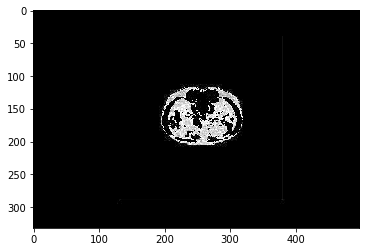

In [19]:
img = cv2.imread("thresh2.jpg")
clone = img.copy()
(H, W) = img.shape[:2]
img_centre_x = W//2
img_centre_y = H//2
plt.imshow(img)

In [20]:
img.shape

(332, 498, 3)

(332, 498)

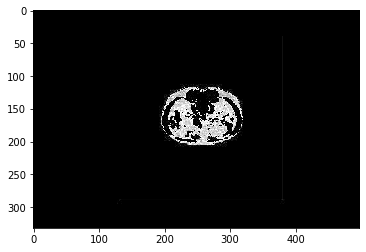

In [21]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.imshow(gray, cmap='gray')
gray.shape

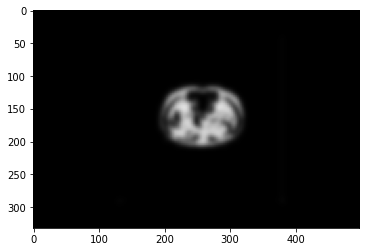

In [22]:
blurred = cv2.GaussianBlur(img, (25, 25), 4)
plt.imshow(blurred)

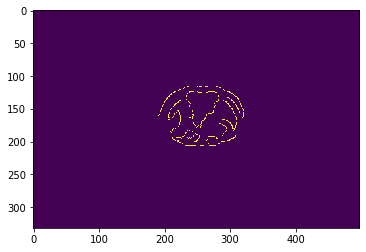

In [23]:
canny = cv2.Canny(blurred, 40, 100)
plt.imshow(canny)

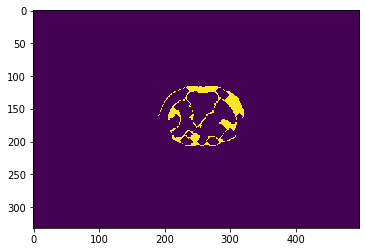

In [24]:
dilateSize = 3
#dilateSize = 15
kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (dilateSize,dilateSize))
#canny_morphed = cv2.morphologyEx(canny, cv2.MORPH_CLOSE, kernel)
#canny_morphed = cv2.morphologyEx(canny, cv2.MORPH_OPEN, kernel)
canny_morphed = canny
canny_morphed  = cv2.dilate(canny_morphed,kernel,iterations=5)
#cv2.imshow("canny_morphed1", canny_morphed)
canny_morphed  = cv2.erode(canny_morphed,kernel,iterations=5)
plt.imshow(canny_morphed)

In [25]:
MIN_CONTOUR_AREA = 7000
RESIZE_IMAGE = False
DEBUG = False

In [26]:
import contour_lib
contours_list = contour_lib.get_contours(canny_morphed, min_contour_area=1500.0)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


No of points in contour= 270, area: 7509.5


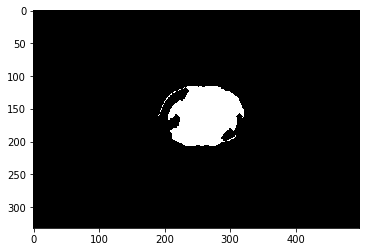

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


No of points in contour= 170, area: 3516.5


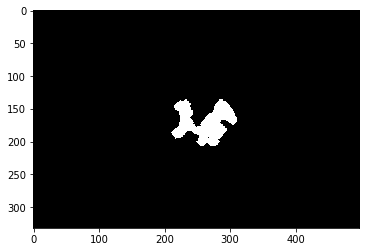

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


No of points in contour= 61, area: 1579.0


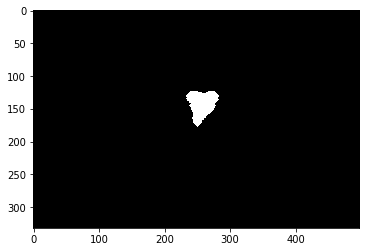

In [27]:
for c in contours_list:
    tmpAreaBlack = np.zeros(clone.shape)
    print("No of points in contour= {}, area: {}".format(len(c[0]), c[2]))
    cv2.drawContours(tmpAreaBlack,[c[0]], 0, (255,255,255),cv2.FILLED)
    plt.imshow(tmpAreaBlack)
    plt.show()

No of points in contour= 1, area: 3516.5


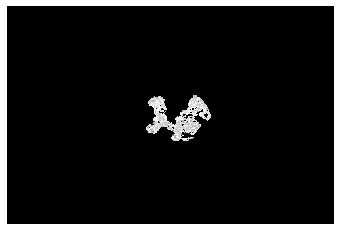

In [28]:
tmpAreaBlack = np.zeros(clone.shape)
c=contours_list[1]
print("No of points in contour= {}, area: {}".format(len([0]), c[2]))
cv2.drawContours(tmpAreaBlack,[c[0]], 0, (255,255,255),cv2.FILLED)

mask = tmpAreaBlack[:,:,0].astype("uint8")
new_img_blk_bg = cv2.bitwise_and(clone, clone, mask=mask)
plt.imshow(new_img_blk_bg)
plt.axis("off")
plt.savefig("VAT1.jpg")
plt.show()



## FOR SAT

(332, 498)

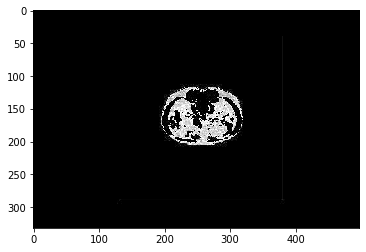

In [29]:
gray2 = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.imshow(gray2, cmap='gray')
gray2.shape

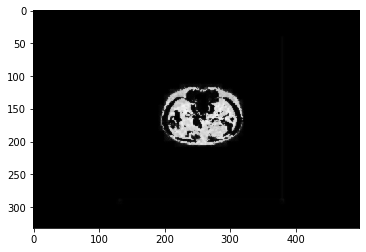

In [30]:
#blurred2 = cv2.GaussianBlur(img, (13, 13), 0)
blurred2 = cv2.bilateralFilter(img,5,500,500)
plt.imshow(blurred2)

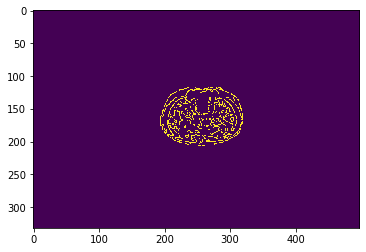

In [31]:
canny2 = cv2.Canny(blurred2, 50, 100)
plt.imshow(canny2)

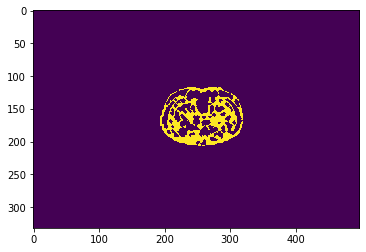

In [32]:
dilateSize = 3
#dilateSize = 15
kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (dilateSize,dilateSize))
#canny_morphed = cv2.morphologyEx(canny, cv2.MORPH_CLOSE, kernel)
#canny_morphed = cv2.morphologyEx(canny, cv2.MORPH_OPEN, kernel)
canny_morphed = canny2
canny_morphed  = cv2.dilate(canny_morphed,kernel,iterations=2)
#cv2.imshow("canny_morphed1", canny_morphed)
canny_morphed  = cv2.erode(canny_morphed,kernel,iterations=2)
plt.imshow(canny_morphed)

In [33]:
MIN_CONTOUR_AREA = 7000
RESIZE_IMAGE = False
DEBUG = False

In [34]:
import contour_lib
contours_list = contour_lib.get_contours(canny_morphed, min_contour_area=1500.0)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


No of points in contour= 174, area: 9107.5


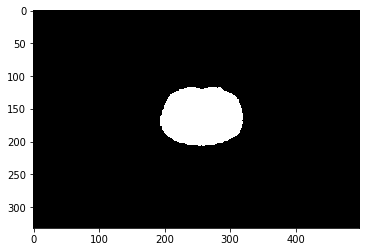

In [35]:
for c in contours_list:
    tmpAreaBlack = np.zeros(clone.shape)
    print("No of points in contour= {}, area: {}".format(len(c[0]), c[2]))
    cv2.drawContours(tmpAreaBlack,[c[0]], 0, (255,255,255),cv2.FILLED)
    plt.imshow(tmpAreaBlack)
    plt.show()

In [69]:
# tmpAreaBlack = np.zeros(clone.shape)
# c=contours_list[1]
# print("No of points in contour= {}, area: {}".format(len([0]), c[2]))
# cv2.drawContours(tmpAreaBlack,[c[0]], 0, (255,255,255),cv2.FILLED)

# mask = tmpAreaBlack[:,:,0].astype("uint8")
# new_img_blk_bg = cv2.bitwise_and(clone, clone, mask=mask)
# plt.imshow(new_img_blk_bg)
# plt.axis("off")
# plt.savefig("SAT1.jpg")
# plt.show()

## FULL FAT WHITE PIXEL COUNT

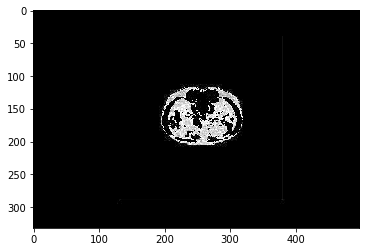

In [37]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

#img = cv2.imread("tepsi.jpg")
img1 = cv2.imread("thresh2.jpg")
hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
mask = cv2.inRange(hsv,(21, 10, 15), (30, 255, 255) )
plt.imshow(img1)
#cv2.imshow("orange", mask)
#cv2.waitKey()
#cv2.destroyAllWindows()

In [38]:
b, g, r = cv2.split(img)
wb = b == 255
wg = g == 255
wr = r == 255

In [39]:
white_pixels_if_true = np.bitwise_and(wb, np.bitwise_and(wg, wr))


In [40]:
img_size = r.size
white_pixels_count = np.sum(white_pixels_if_true)
white_area_ratio = white_pixels_count / img_size

In [41]:
white_area_ratio

0.004300333865582813

In [42]:
white_pixels_count

711

## VAT WHITE PIXEL COUNT

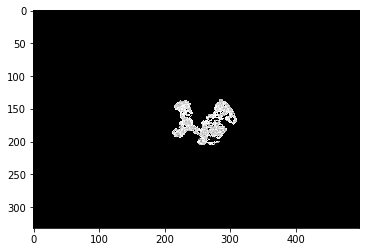

In [45]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

#img = cv2.imread("tepsi.jpg")
#img = cv2.imread(new_img_blk_bg)
hsv = cv2.cvtColor(new_img_blk_bg, cv2.COLOR_BGR2HSV)
mask = cv2.inRange(hsv,(21, 10, 15), (30, 255, 255) )
plt.imshow(new_img_blk_bg)
#cv2.imshow("orange", mask)
#cv2.waitKey()
#cv2.destroyAllWindows()

In [51]:
b, g, r = cv2.split(new_img_blk_bg)
wb = b == 255
wg = g == 255
wr = r == 255

In [58]:
white_pixels_if_true2 = np.bitwise_and(wb, np.bitwise_and(wg, wr))


In [63]:
img_size = r.size
white_pixels_count2 = np.sum(white_pixels_if_true2)
white_area_ratio2 = white_pixels_count / img_size

In [64]:
white_area_ratio2

0.0024072192383993805

In [65]:
white_pixels_count2

398

## VFI

In [68]:
ratio = white_pixels_count2/white_pixels_count
ratio

1.0

## De-Blurr Image

In [ ]:
#pip install scikit-image

In [ ]:

# from skimage import color
# from skimage import io

# img = color.rgb2gray(io.imread('C:/Users/rutuj/Downloads/imagesegmentation/Outputs/output30.jpg'))
# plt.imshow(img)


In [ ]:
# print(np.shape(img))
# fig = plt.figure(dpi=110)
# plt.imshow(img, vmin=0.55, vmax=0.70
#            , cmap='gray')
# plt.axis('off')
# plt.savefig('filter1.jpg', transparent=True, bbox_inches='tight', pad_inches=0)

In [ ]:
# from PIL import ImageEnhance
# from PIL import Image
# xi = Image.open('filter1.jpg')

# enhancer = ImageEnhance.Contrast(xi)

# enhanced_im = enhancer.enhance(1
#                               )
# enhanced_im.save('deblur30.jpg')
# enhanced_im

In [ ]:
# import numpy as np
# import matplotlib.pyplot as plt

# from scipy.signal import convolve2d as conv2

# from skimage import color, data, restoration


In [ ]:

# #astro = color.rgb2gray(io.imread('C:/Users/rutuj/Downloads/imagesegmentation/Outputs/output1.jpg'))
# psf = np.ones((5, 5)) / 25
# astro = conv2(astro, psf, 'same')
# # Add Noise to Image
# astro_noisy = astro.copy()
# astro_noisy += (np.random.poisson(lam=25, size=astro.shape) - 10) / 255.

# # Restore Image using Richardson-Lucy algorithm
# deconvolved_RL = restoration.richardson_lucy(astro_noisy, psf, iterations=30)

# fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(8, 5))
# plt.gray()

# for a in (ax[0], ax[1], ax[2]):
#        a.axis('off')

# ax[0].imshow(astro)
# ax[0].set_title('Original Data')

# ax[1].imshow(astro_noisy)
# ax[1].set_title('Noisy data')

# ax[2].imshow(deconvolved_RL, vmin=astro_noisy.min(), vmax=astro_noisy.max())
# ax[2].set_title('Restoration using\nRichardson-Lucy')


# fig.subplots_adjust(wspace=0.02, hspace=0.2,
#                     top=0.9, bottom=0.05, left=0, right=1)
# plt.show()